## Observations and Insights
   Cristina Elizondo

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Import and Read CSV Files
    # Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

    # Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Check the number of mice in the Original DataFrame
len(combined_df["Mouse ID"].unique())

249

In [3]:
# Get the duplicate mice by ID number
duplicated_df = combined_df.loc[combined_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"]
duplicated_df

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [4]:
# Clean the DataFrame from duplicates
clean_df = combined_df.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# Check the number of mice in the Clean DataFrame
# It shouldn't change, just there's only one per Mouse ID
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby Regimen and then do the pandas operations to get all the data, add them in separated columns
regimen_df = pd.DataFrame(clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].mean())
regimen_df = regimen_df.rename(columns={"Tumor Volume (mm3)":"Mean"})
regimen_df["Median"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].median()
regimen_df["Variance"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].var()
regimen_df["Standard Deviation"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].std()
regimen_df["SEM"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].sem()
regimen_df["Count"] = clean_df.groupby(by=["Drug Regimen"], as_index=True)["Tumor Volume (mm3)"].count()
regimen_df

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM,Count
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135,151
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


## Bar Plots

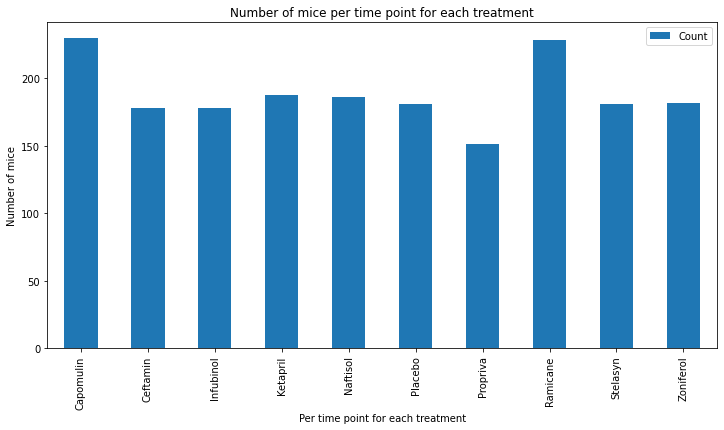

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# Using Pandas

    # Count value for the total mice per time period per regimen
bar_plot = regimen_df["Count"]

    # Plot as a Bar Graph (df.plot and kind="bar")
bar_plot.plot(kind="bar", figsize=(12,6), legend=True)
plt.ylabel("Number of mice")
plt.xlabel("Per time point for each treatment")
plt.title("Number of mice per time point for each treatment")
plt.show()
    
    # Shorter Alternative:
#bar_plot_df.plot(kind="bar", x="Drug Regimen", y="Mouse ID", figsize=(20,10))
#clean_df.groupby(by=["Drug Regimen","Timepoint"]).size().unstack().plot(kind="bar", stacked=True, figsize=(12,6))

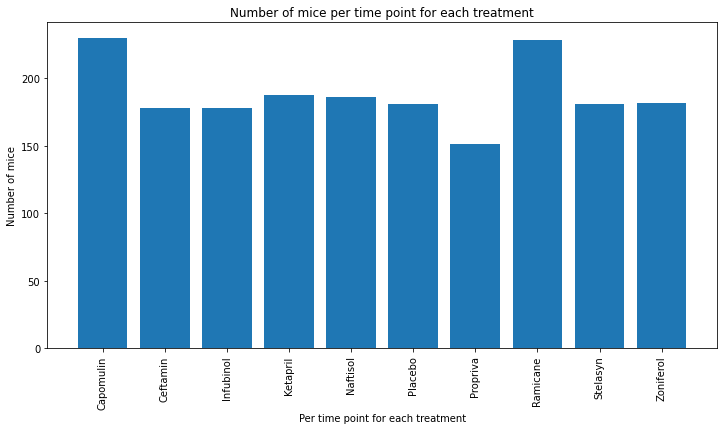

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study 
# Using Pyplot

    # Set the Size for the Graph
plt.figure(figsize=(12,6))

    # Plot as Bar Graph (plt.bar)
plt.bar(x=bar_plot.index, height=bar_plot.values)
plt.ylabel("Number of mice")
plt.xlabel("Per time point for each treatment")
plt.xticks(rotation="vertical")
plt.title("Number of mice per time point for each treatment")
plt.show()

## Pie Plots

In [9]:
# Group and Count by Sex
pie_plot = pd.DataFrame(clean_df.groupby(by=["Sex","Mouse ID"], as_index=False).count())
pie_plot = pd.DataFrame(clean_df.groupby(by=["Sex"]).count())["Mouse ID"]
pie_plot

Sex
Female    925
Male      958
Name: Mouse ID, dtype: int64

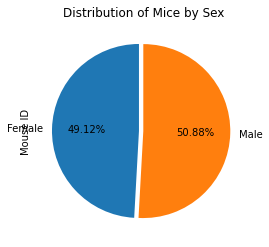

In [10]:
# Generate a pie plot showing the distribution of female versus male mice
# Using pandas
pie_plot.plot(kind="pie", autopct='%1.2f%%', startangle=90, explode=(0.05,0), shadow=False,figsize=(4, 4))
plt.title("Distribution of Mice by Sex")
plt.show()

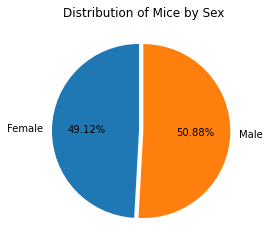

In [11]:
# Generate a pie plot showing the distribution of female versus male mice
# Using Pyplot
labels = pie_plot.index
plt.figure(figsize=(4,4))
plt.pie(pie_plot, labels=labels ,autopct='%1.2f%%', startangle=90, explode=(0.05,0), shadow=False)
plt.title("Distribution of Mice by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Get the 4 more promising treatmets
regimen_df3 = regimen_df.sort_values(by="Count", ascending=False)[["Count"]].head(4)
regimen_df3 = regimen_df3.reset_index()
regimen_df3

,Drug Regimen,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186


In [13]:
# Calculate the final tumor volume of each mouse
# Calculate the IQR and quantitatively determine if there are any potential outliers

    # Data on the last timepoints
test_timepoint = clean_df["Timepoint"] == 45
    # Matching cases with more promising treatments
test_regimen = clean_df["Drug Regimen"].isin(regimen_df3["Drug Regimen"])
    # Assigning values to a sub-dataframe
boxplot = clean_df[ test_timepoint & test_regimen ]

    # Get a single series of the tumor volume for calculations
#pd.DataFrame(box_plot["Tumor Volume (mm3)"])
main_regimens = boxplot["Tumor Volume (mm3)"]

    # Calculate Quartiles and IRQ
quartiles = boxplot["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    # Print values for quartiles
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

    # Print potential outliers
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

boxplot

The lower quartile of Tumor Volume (mm3) is: 33.56240217
The upper quartile of Tumor Volume (mm3) is: 66.26880133
The interquartile range of Tumor Volume (mm3) is: 32.706399160000004
The the median of Tumor Volume (mm3) is: 40.65812366 
Values below -15.497196570000007 could be outliers
Values above 115.32840007000001 could be outliers


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
40,h246,45,74.104086,2,Ketapril,Male,13,30
50,p189,45,75.294936,4,Ketapril,Male,8,28
79,b559,45,73.051363,1,Naftisol,Male,20,26
89,y260,45,62.909441,4,Ketapril,Female,7,25
...,...,...,...,...,...,...,...,...
1844,l897,45,38.846876,1,Capomulin,Male,17,19
1857,t565,45,34.455298,0,Capomulin,Female,20,17
1867,i557,45,47.685963,1,Capomulin,Female,1,24
1877,m957,45,33.329098,1,Capomulin,Female,3,19


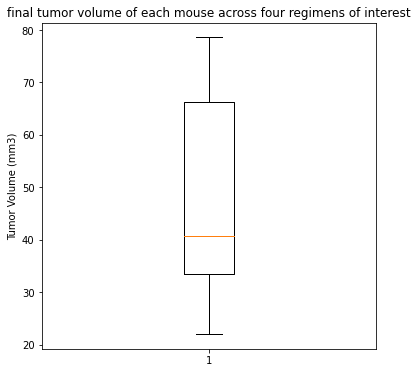

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    # fig1, ax1 = plt.subplots()
    # green_markers = dict(markerfacecolor='g', marker='o')
    # flierprops=green_markers, showfliers=True)

plt.figure(figsize=(6,6))
plt.title('final tumor volume of each mouse across four regimens of interest')
plt.ylabel('Tumor Volume (mm3)')

plt.boxplot(boxplot["Tumor Volume (mm3)"])

plt.show()

## Line and Scatter Plots

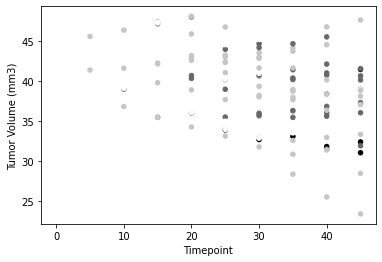

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

lineplot_capomulin = clean_df["Drug Regimen"] == "Capomulin"
lineplot = clean_df.loc[lineplot_capomulin]
colors = lineplot["Metastatic Sites"]
lineplot.plot(kind="scatter",x="Timepoint", y="Tumor Volume (mm3)", c=colors)

plt.show()

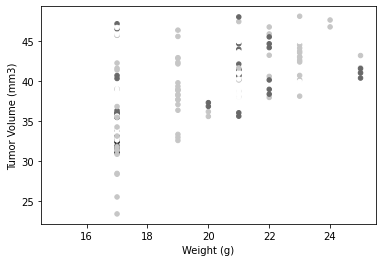

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

lineplot_capomulin = clean_df["Drug Regimen"] == "Capomulin"
lineplot = clean_df.loc[lineplot_capomulin]
colors = lineplot["Metastatic Sites"]
lineplot.plot(kind="scatter",x="Weight (g)", y="Tumor Volume (mm3)", c=colors)

plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

(slope,intercept,rvalue,pvalue,stderr)=st.linregress(
    lineplot["Weight (g)"],lineplot["Tumor Volume (mm3)"])

print(f"""Slope = {slope}
Intecept = {intercept}
r = {rvalue}
p = {pvalue}
StdErr = {stderr}

y = ({slope})x + {intercept}
""")

Slope = 0.9609669432428367
Intecept = 21.48982721329954
r = 0.5256995552077169
p = 9.605446629501521e-18
StdErr = 0.10298279892023668

y = (0.9609669432428367)x + 21.48982721329954

